In [ ]:
#Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum-Tugas_MachineLearning/Praktikum3"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Baca dataset
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum-Tugas_MachineLearning/Praktikum3/Data/day.csv')

# Lihat 5 baris pertama
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Tentukan X (independen) dan y (dependen)
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']


In [ ]:
# Bagi data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Buat dan latih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE : 617.3930656443376
MSE : 691035.0082022651
RMSE: 831.2851545662686
R² Score: 0.8276670090367212


In [ ]:
# Lihat koefisien tiap fitur
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)


       Feature  Coefficient
0       season   524.722536
1           yr  2023.997547
2         mnth   -38.444658
3      holiday  -391.550766
4      weekday    72.937003
5   workingday   160.804892
6   weathersit  -632.856284
7         temp  2097.247836
8        atemp  3488.042179
9          hum  -865.439419
10   windspeed -2080.540395


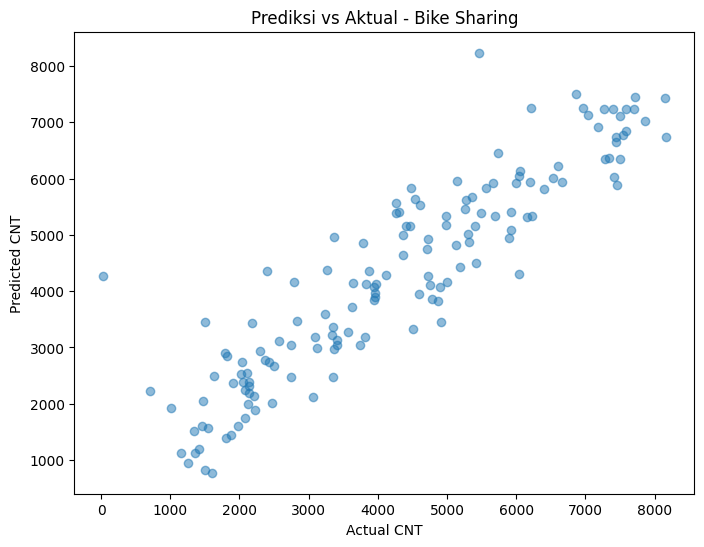

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CNT")
plt.ylabel("Predicted CNT")
plt.title("Prediksi vs Aktual - Bike Sharing")
plt.show()
